In [145]:
import numpy as np
import pandas as pd

In [146]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Email-spam-classifier/spam.csv',encoding='latin-1')

In [147]:
df.shape

(5572, 5)

In [148]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [149]:
df.shape

(5572, 5)

# **Data Cleaning**

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [151]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [152]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [153]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [154]:
df['target']=encoder.fit_transform(df['target'])

In [155]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [156]:
df.isnull().sum()

,0
target,0
text,0


In [157]:
df.duplicated().sum()

np.int64(403)

In [158]:
df = df.drop_duplicates(keep='first')

In [159]:
df.shape

(5169, 2)

In [160]:
df['target'].value_counts()

,count
target,
0,4516
1,653


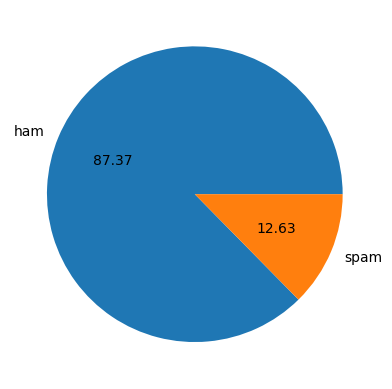

In [161]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [162]:
import nltk

In [163]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [164]:
df['num_characters'] = df['text'].apply(len)

In [165]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [166]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [167]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [168]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [169]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [170]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [171]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

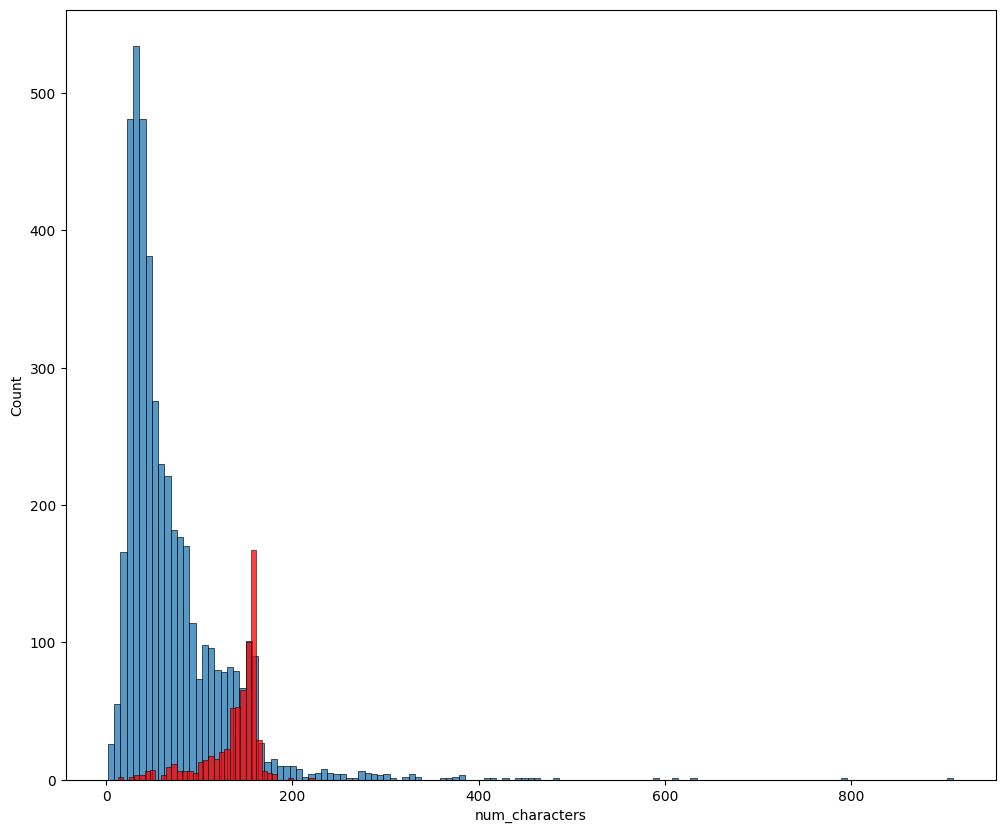

In [172]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

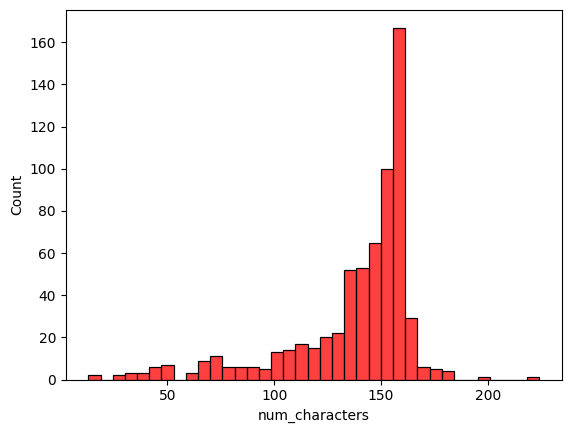

In [173]:
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

In [174]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [175]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [176]:
transform_text('Hi! How are you Sundaram? I loved Machine Learning lectures on YT!')

'hi sundaram love machin learn lectur yt'

In [177]:
df['transformed_text'] = df['text'].apply(transform_text)

In [178]:
print(df['transformed_text'].head())
print(type(df['transformed_text'].iloc[0]))  # Should be <class 'str'>

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: transformed_text, dtype: object
<class 'str'>


In [179]:
df.shape

(5169, 6)

In [180]:
df[df['target'] == 1]['transformed_text']

,transformed_text
2,free entri 2 wkli comp win fa cup final tkt 21...
5,freemsg hey darl 3 week word back like fun sti...
8,winner valu network custom select receivea pri...
9,mobil 11 month u r entitl updat latest colour ...
11,six chanc win cash 100 pound txt csh11 send co...
...,...
5537,want explicit sex 30 sec ring 02073162414 cost...
5540,ask 3mobil 0870 chatlin inclu free min india c...
5547,contract mobil 11 mnth latest motorola nokia e...
5566,remind o2 get pound free call credit detail gr...


In [181]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [182]:
len(spam_corpus)

9939

<Axes: xlabel='count', ylabel='word'>

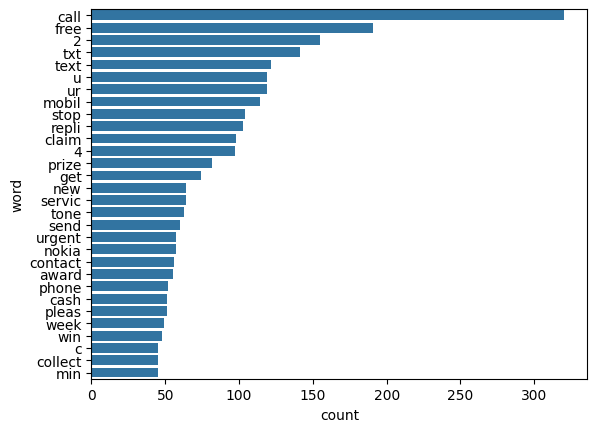

In [183]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word','count'])
sns.barplot(x='count',y='word',data=most_common_words)


In [184]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

<Axes: xlabel='count', ylabel='word'>

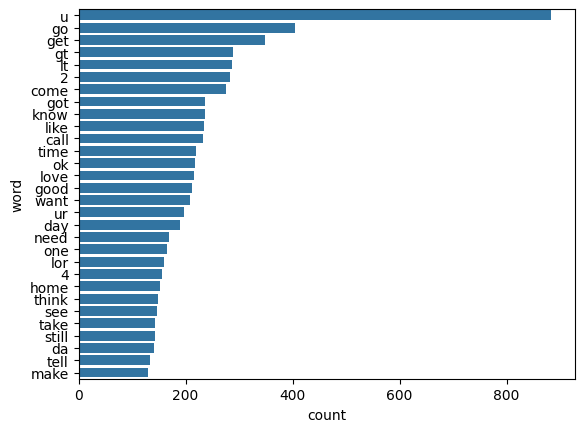

In [185]:
from collections import Counter
most_common_words_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word','count'])
sns.barplot(x='count',y='word',data=most_common_words_ham)


# **Model Building**

In [207]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [208]:
X2 = cv.fit_transform(df['transformed_text']).toarray()

In [209]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [210]:
X2.shape

(5169, 3000)

In [211]:
y = df['target'].values

In [212]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [214]:
from sklearn.model_selection import train_test_split


In [215]:
X_train, X_test, y_train,y_test = train_test_split(X2,y,test_size=0.2,random_state=2)

In [216]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [217]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [218]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [219]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [198]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[894   2]
 [ 19 119]]
0.9834710743801653


In [220]:
## tfidf ----> mnb or bnb i personally support bnb

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier


In [222]:
svc = LinearSVC()
lrc = LogisticRegression(solver='saga',max_iter=1000)

In [223]:
clfs = {
    'SVC' : svc,
    'LR' : lrc,
    'MNB' : mnb
}

In [224]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  conf_mat = confusion_matrix(y_test,y_pred)
  return accuracy, precision,conf_mat

In [230]:
voting = VotingClassifier(
    estimators=[
    ('SVC', svc),
    ('MNB' , mnb),
    ('LR' , lrc)
    ],
    voting='hard'
)
voting.fit(X_train, y_train)

y_pred_voting = voting.predict(X_test)

print(accuracy_score(y_test,y_pred_voting))
print(precision_score(y_test,y_pred_voting))
print(confusion_matrix(y_test,y_pred_voting))

0.9700193423597679
0.9819819819819819
[[894   2]
 [ 29 109]]


In [225]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision,current_conf_mat = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For",name)
  print("Accuracy",current_accuracy)


  print("Confusion_matrix",current_conf_mat)
  print("Precision",current_precision)


  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy 0.9777562862669246
Confusion_matrix [[892   4]
 [ 19 119]]
Precision 0.967479674796748
For LR
Accuracy 0.9545454545454546
Confusion_matrix [[894   2]
 [ 45  93]]
Precision 0.9789473684210527
For MNB
Accuracy 0.9709864603481625
Confusion_matrix [[896   0]
 [ 30 108]]
Precision 1.0


In [231]:
import pickle

In [232]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clfs['SVC'],open('model.pkl','wb'))